In [2]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import torch
import random

## Generating Data Sets



In [3]:
num_inputs = 2
num_examples = 1000
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features = torch.zeros(size=(num_examples, num_inputs)).normal_()
labels = torch.matmul(features, true_w) + true_b
labels += torch.zeros(size=labels.shape).normal_(std=0.01)

In [31]:
features[0], labels[0]

(tensor([-0.1470, -0.8376]), tensor(6.7625))

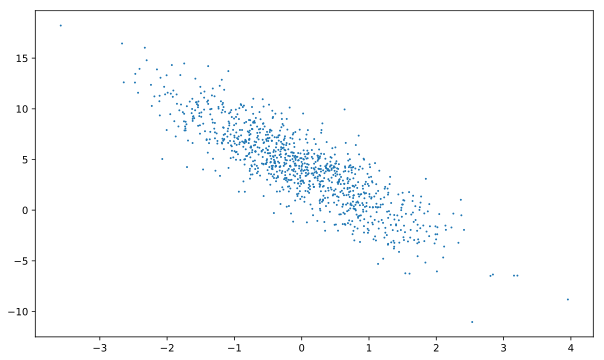

In [32]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(10, 6)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

## Reading Data

In [6]:
def data_iter(batch_sie, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    
    random.shuffle(indices)
    
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[j], labels[j]

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 1.1550,  0.6437],
        [-0.8838, -0.0548],
        [ 1.5010, -0.1231],
        [ 0.2259,  0.1461],
        [ 0.4774, -0.2843],
        [ 1.4893, -0.3017],
        [ 2.9129, -1.0900],
        [ 0.7703, -0.5015],
        [ 0.1694, -0.4127],
        [-0.4789, -1.5124]]) tensor([ 4.3225,  2.6389,  7.6119,  4.1616,  6.1268,  8.1856, 13.7222,  7.4514,
         5.9239,  8.3761])


## Initialize Model Parameters

In [8]:
w = torch.zeros(size=(num_inputs, 1)).normal_(std=0.01)
b = torch.zeros(size=(1,))

In [9]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

## Define the Model

In [10]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

## Define the Loss Function

In [11]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

## Define the Optimization Algorithm

In [12]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

In [13]:
lr = 0.03 # Learning rate
num_epochs = 3 # Number of iterations
net = linreg # Linear model
loss = squared_loss # 0.5 (y - y')^2

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.mean().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean().numpy()))

epoch 1, loss 9.112999
epoch 2, loss 4.980008
epoch 3, loss 2.721478


In [14]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w tensor([ 0.7932, -1.3858], grad_fn=<SubBackward0>)
Error in estimating b tensor([1.6930], grad_fn=<RsubBackward1>)
